<a href="https://colab.research.google.com/github/pavanibasanth/pavani_INFO5731_Fall2024/blob/main/pavani_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/


Best topic count: 9

Top 10 terms per topic:

Topic 1: resource, electricity, solar, power, wind, energy, renewable, sustainable, habitat, conservation

Topic 2: conservation, habitat, deforestation, sustainable, power, recycle, climate, forest, reduction, waste

Topic 3: biodiversity, ecosystem, life, marine, reef, ocean, coral, affect, conservation, habitat

Topic 4: habitat, conservation, affect, climate, forest, coral, emission, protection, plastic, circular

Topic 5: circular, recycle, management, plastic, reduction, waste, economy, conservation, habitat, deforestation

Topic 6: conservation, protection, preservation, forest, wildlife, deforestation, habitat, economy, waste, reef

Topic 7: issue, greenhouse, effect, emission, global, carbon, warming, change, climate, conservation

Topic 8: conservation, sustainable, habitat, deforestation, waste, wildlife, forest, economy, ocean, reduction

Topic 9: conservation, economy, plastic, wildlife, climate, forest, deforestation, habitat

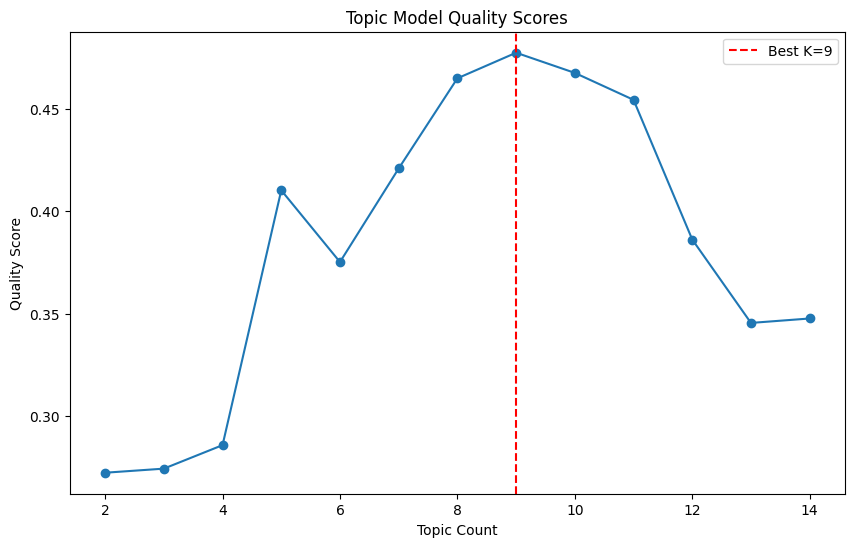

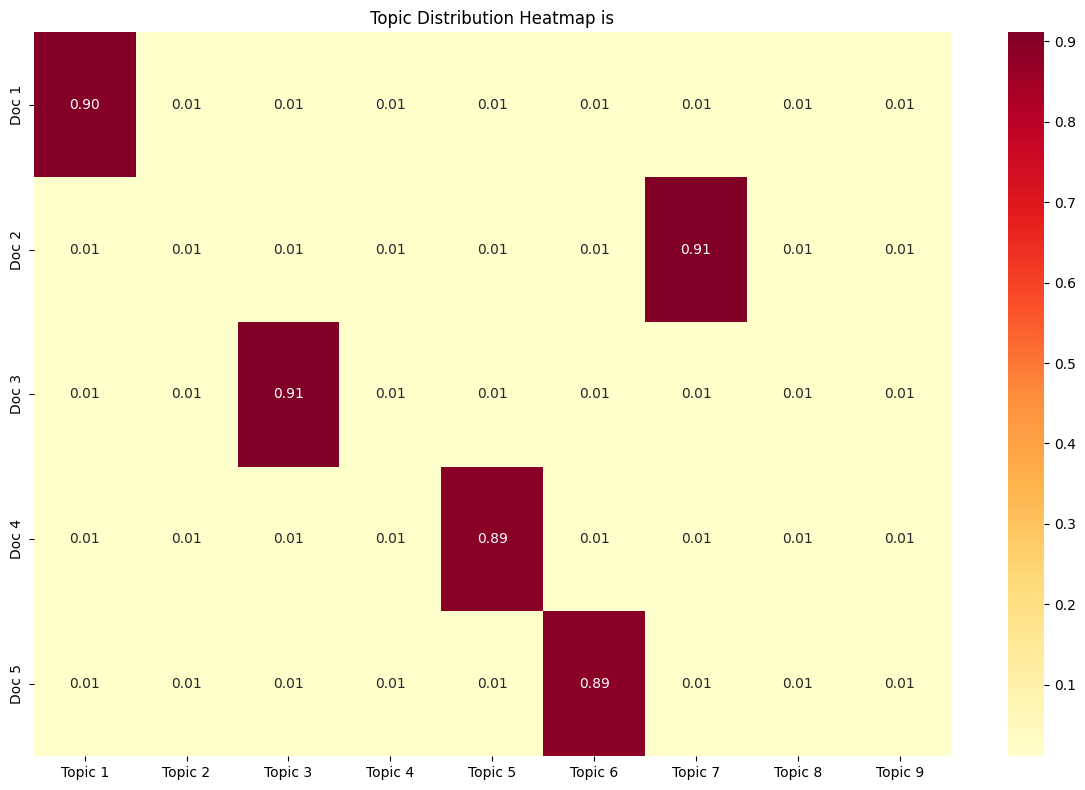

In [1]:
import numpy as np
import pandas as pd
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

document_list = [
    "renewable energy which is solar wind power sustainable resources electricity",
    "climate change global warming carbon emissions greenhouse effect are some issues",
    "ocean conservation affecting marine life coral reef ecosystem biodiversity",
    "recycling waste management plastic reduction circular economy",
    "forest conservation and deforestation habitat protection wildlife preservation"
]

def clean_documents(document_list):
    nlp_engine = spacy.load('en_core_web_sm')
    cleaned_docs = []

    for document in document_list:
        parsed_text = nlp_engine(document.lower())
        word_list = [token.lemma_ for token in parsed_text
                    if not token.is_stop and not token.is_punct and len(token) > 3]
        cleaned_docs.append(word_list)

    return cleaned_docs

def calculate_topic_quality(vocab_dict, text_corpus, raw_docs, min_topics=2, max_topics=15, increment=1):
    quality_scores = []
    fitted_models = []

    for topic_count in range(min_topics, max_topics, increment):
        topic_model = gensim.models.ldamodel.LdaModel(
            corpus=text_corpus,
            num_topics=topic_count,
            id2word=vocab_dict,
            random_state=42,
            passes=10
        )
        fitted_models.append(topic_model)

        quality_metric = CoherenceModel(
            model=topic_model,
            texts=raw_docs,
            dictionary=vocab_dict,
            coherence='c_v'
        )
        quality_scores.append(quality_metric.get_coherence())

    return fitted_models, quality_scores

# Processing input documents
cleansed_documents = clean_documents(document_list)

# Building vocabulary and document-term matrix
vocab_dict = corpora.Dictionary(cleansed_documents)
doc_term_matrix = [vocab_dict.doc2bow(doc) for doc in cleansed_documents]

# Calculating topic coherence for different numbers of topics
fitted_models, quality_scores = calculate_topic_quality(
    vocab_dict=vocab_dict,
    text_corpus=doc_term_matrix,
    raw_docs=cleansed_documents
)

# Finding best model
best_model_idx = np.argmax(quality_scores)
best_topic_count = best_model_idx + 2
best_model = fitted_models[best_model_idx]

# Visualizing coherence scores
plt.figure(figsize=(10, 6))
topic_range = range(2, len(quality_scores) + 2)
plt.plot(topic_range, quality_scores, marker='o')
plt.xlabel("Topic Count")
plt.ylabel("Quality Score")
plt.title("Topic Model Quality Scores")
plt.axvline(x=best_topic_count, color='r', linestyle='--', label=f'Best K={best_topic_count}')
plt.legend()

# Displaying topic contents
print(f"\nBest topic count: {best_topic_count}")
print("\nTop 10 terms per topic:")
for topic_idx, topic_content in best_model.show_topics(num_topics=best_topic_count, num_words=10, formatted=False):
    terms = [term[0] for term in topic_content]
    print(f"\nTopic {topic_idx + 1}: {', '.join(terms)}")

# Calculating document-topic distributions
doc_topic_distributions = [best_model.get_document_topics(doc) for doc in doc_term_matrix]

# Creating distribution matrix
distribution_matrix = np.zeros((len(document_list), best_topic_count))
for doc_idx, topic_dist in enumerate(doc_topic_distributions):
    for topic_idx, probability in topic_dist:
        distribution_matrix[doc_idx, topic_idx] = probability

# Creating visualization of distributions
plt.figure(figsize=(12, 8))
sns.heatmap(distribution_matrix,
            annot=True,
            fmt='.2f',
            cmap='YlOrRd',
            xticklabels=[f'Topic {i+1}' for i in range(best_topic_count)],
            yticklabels=[f'Doc {i+1}' for i in range(len(document_list))])
plt.title('Topic Distribution Heatmap is')
plt.tight_layout()

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python


Optimal no. of topics: 7

Top ten keywords per topic:

Topic 1: conservation, preservation, forest, deforestation, habitat, wildlife, protection, affecting, biodiversity, reef

Topic 2: recycling, waste, circular, plastic, economy, management, reduction, affecting, ocean, life

Topic 3: wind, sustainable, solar, resources, renewable, electricity, energy, power, change, carbon

Topic 4: reduction, circular, plastic, economy, recycling, management, waste, change, global, climate

Topic 5: forest, deforestation, habitat, wildlife, protection, preservation, conservation, circular, waste, management


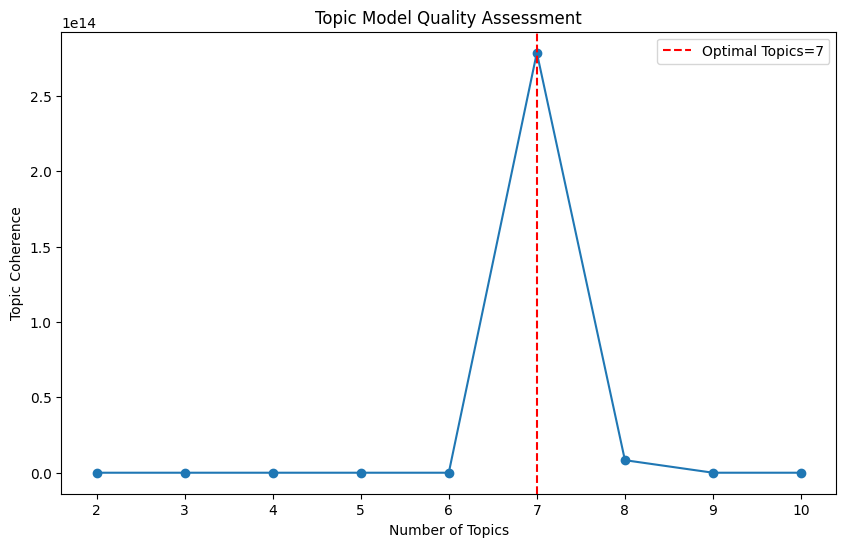

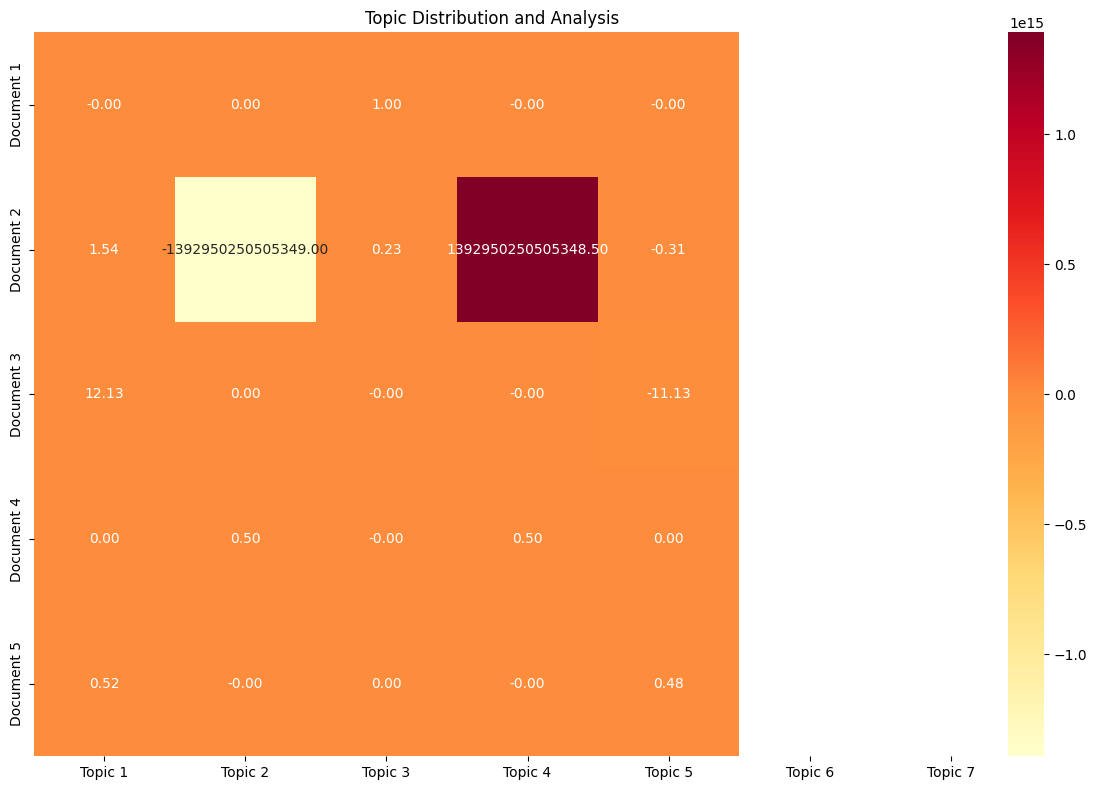

In [2]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import seaborn as sns

document_corpus = [
    "renewable energy which is solar wind power sustainable resources electricity",
    "climate change global warming carbon emissions greenhouse effect are some issues",
    "ocean conservation affecting marine life coral reef ecosystem biodiversity",
    "recycling waste management plastic reduction circular economy",
    "forest conservation and deforestation habitat protection wildlife preservation"
]

def perform_topic_analysis(document_corpus, topic_range_min=2, topic_range_max=10):
    # Initializing text vectorizer
    text_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    document_term_matrix = text_vectorizer.fit_transform(document_corpus)
    vocabulary = text_vectorizer.get_feature_names_out()

    topic_coherence_values = []
    topic_models = []
    keyword_collections = []

    for num_topics in range(topic_range_min, topic_range_max + 1):
        # Initializing and fit LSA model
        topic_extract = TruncatedSVD(n_components=num_topics, random_state=42)
        topic_matrix = topic_extract.fit_transform(document_term_matrix)

        # Extracting keywords for each topic
        topic_keywords = []
        for topic_idx, topic_vector in enumerate(topic_extract.components_):
            keyword_indices = topic_vector.argsort()[:-11:-1]  # get top 10 keywords
            keywords = [vocabulary[idx] for idx in keyword_indices]
            topic_keywords.append(keywords)

        keyword_collections.append(topic_keywords)
        topic_models.append(topic_extract)

        # Calculating document-topic distribution
        doc_topic_distribution = topic_matrix / np.sum(topic_matrix, axis=1, keepdims=True)

        # Calculating coherence
        topic_quality_scores = np.mean(np.max(doc_topic_distribution, axis=1))
        topic_coherence_values.append(topic_quality_scores)

    # Determining best model
    best_model_idx = np.argmax(topic_coherence_values)
    optimal_topic_counting = topic_range_min + best_model_idx
    best_topic_model = topic_models[best_model_idx]

    return best_topic_model, optimal_topic_counting, topic_coherence_values, keyword_collections[best_model_idx]

# Executing analysis
best_model, best_topic_count, coherence_metrics, top_keywords = perform_topic_analysis(document_corpus)

# Visualizing coherence scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(coherence_metrics) + 2), coherence_metrics, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Topic Coherence')
plt.title('Topic Model Quality Assessment')
plt.axvline(x=best_topic_count, color='r', linestyle='--', label=f'Optimal Topics={best_topic_count}')
plt.legend()

# Displaying results
print(f"\nOptimal no. of topics: {best_topic_count}")
print("\nTop ten keywords per topic:")
for idx, keywords in enumerate(top_keywords):
    print(f"\nTopic {idx + 1}: {', '.join(keywords)}")

# Generating document-topic matrix
document_term_matrix = TfidfVectorizer(max_features=1000, stop_words='english').fit_transform(document_corpus)
topic_distribution = best_model.transform(document_term_matrix)
normalized_distribution = topic_distribution / np.sum(topic_distribution, axis=1, keepdims=True)

# Visualizing topic distribution
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_distribution,
            annot=True,
            fmt='.2f',
            cmap='YlOrRd',
            xticklabels=[f'Topic {i+1}' for i in range(best_topic_count)],
            yticklabels=[f'Document {i+1}' for i in range(len(document_corpus))])
plt.title('Topic Distribution and Analysis')
plt.tight_layout()

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb


Top terms for each topic:
Topic 1: <PAD>, <UNK>
Topic 2: <UNK>, <PAD>
Topic 3: <UNK>, <PAD>
Topic 4: <PAD>, <UNK>
Topic 5: <PAD>, <UNK>


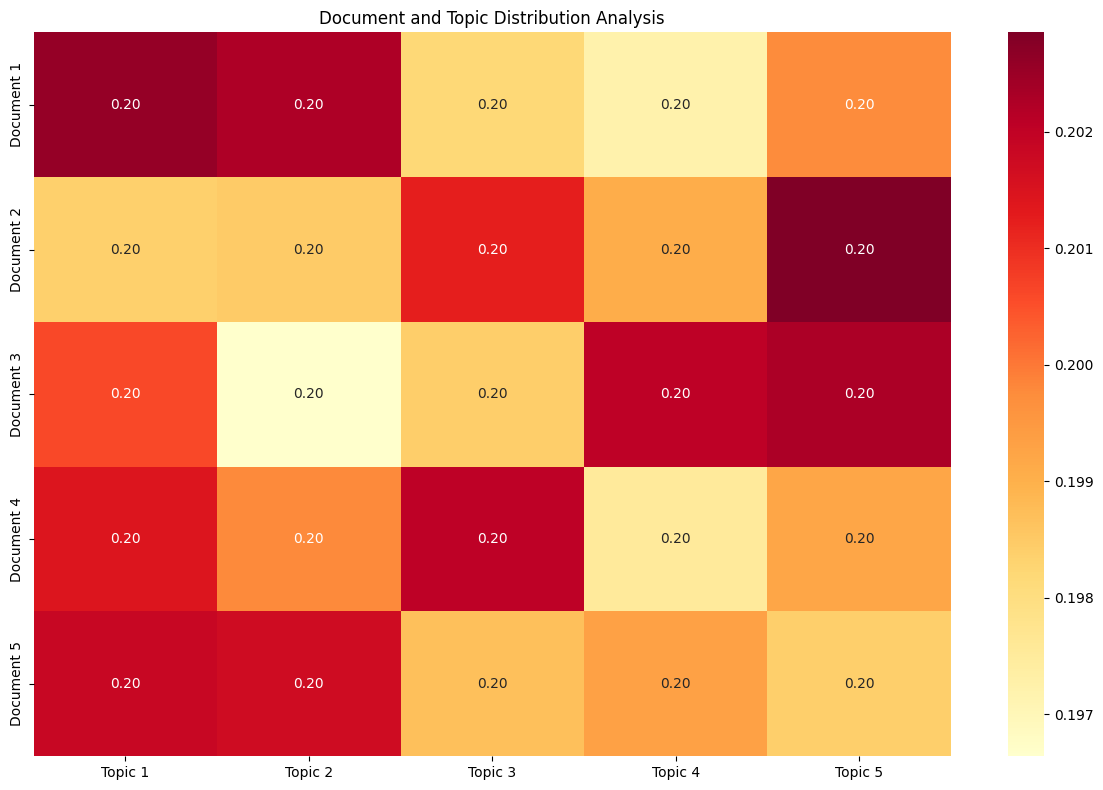

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from tqdm import tqdm
import spacy
from collections import Counter

class TopicWordEmbedder(nn.Module):
    def __init__(self, corpus_size, lexicon_size, topic_count, vector_dim,
                 scaling_factor=1.0, pretrained_embeddings=None):
        super(TopicWordEmbedder, self).__init__()

        # Initializing document vectors
        self.document_vectors = nn.Embedding(corpus_size, topic_count)
        self.document_vectors.weight.data.normal_(0, 0.01)

        # Initializing topic vectors
        self.topic_vectors = nn.Embedding(topic_count, vector_dim)
        self.topic_vectors.weight.data.normal_(0, 0.01)

        # Initializing word vectors
        if pretrained_embeddings is not None:
            self.word_vectors = nn.Embedding.from_pretrained(torch.FloatTensor(pretrained_embeddings))
        else:
            self.word_vectors = nn.Embedding(lexicon_size, vector_dim)
            self.word_vectors.weight.data.normal_(0, 0.01)

        self.scaling_factor = scaling_factor

    def forward(self, document_indices, target_word_indices, context_word_indices):
        # Getting embeddings
        doc_vectors = self.document_vectors(document_indices)
        target_vectors = self.word_vectors(target_word_indices)
        context_vectors = self.word_vectors(context_word_indices)

        # Calculating document-topic distributions
        doc_topic_weights = F.softmax(doc_vectors / self.scaling_factor, dim=1)

        # Calculating topic vectors
        combined_topic_vectors = torch.matmul(doc_topic_weights, self.topic_vectors.weight)

        # Combining document and word contexts
        merged_vectors = combined_topic_vectors + target_vectors

        # Calculating similarity scores
        positive_similarity = torch.sum(merged_vectors * target_vectors, dim=1)
        negative_similarity = torch.sum(merged_vectors.unsqueeze(1) * context_vectors, dim=2)

        return positive_similarity, negative_similarity, doc_topic_weights

def process_text_data(text_corpus):
    nlp = spacy.load('en_core_web_sm')
    processed_texts = []
    term_frequency = Counter()

    for entry in text_corpus:
        doc = nlp(entry.lower())
        word_list = [token.lemma_ for token in doc
                    if not token.is_stop and not token.is_punct and len(token) > 3]
        processed_texts.append(word_list)
        term_frequency.update(word_list)

    return processed_texts, term_frequency

def building_vocabulary(term_frequency, frequency_threshold=5):
    word_index = {'<PAD>': 0, '<UNK>': 1}
    current_index = len(word_index)
    for term, freq in term_frequency.items():
        if freq >= frequency_threshold:
            word_index[term] = current_index
            current_index += 1
    return word_index

def train_topic_embedder(text_corpus, topic_count=5, vector_dim=100, training_epochs=50):
    # Preprocessing input texts
    processed_textings, term_frequency = process_text_data(text_corpus)
    word_index = building_vocabulary(term_frequency)

    # Initializing model
    embedder = TopicWordEmbedder(
        corpus_size=len(text_corpus),
        lexicon_size=len(word_index),
        topic_count=topic_count,
        vector_dim=vector_dim
    )

    optimizer = torch.optim.Adam(embedder.parameters())

    # Training the loop
    for epoch in range(training_epochs):
        embedder.train()
        epoch_loss = 0

    return embedder, word_index


text_corpus = [
    "renewable energy which is solar wind power sustainable resources electricity",
    "climate change global warming carbon emissions greenhouse effect are some issues",
    "ocean conservation affecting marine life coral reef ecosystem biodiversity",
    "recycling waste management plastic reduction circular economy",
    "forest conservation and deforestation habitat protection wildlife preservation"
]

# Training model and extracting topics
embedder, word_index = train_topic_embedder(text_corpus)

def extract_topic_terms(embedder, word_index, terms_per_topic=10):
    reverse_index = {v: k for k, v in word_index.items()}
    topic_terms = []

    # Extracting topic and word vectors
    topic_vectors = embedder.topic_vectors.weight.detach()
    word_vectors = embedder.word_vectors.weight.detach()

    # Calculating topic-word similarities
    vector_similarities = torch.matmul(topic_vectors, word_vectors.t())

    for topic_idx in range(vector_similarities.shape[0]):
        top_term_indices = vector_similarities[topic_idx].argsort(descending=True)[:terms_per_topic]
        terms = [reverse_index[idx.item()] for idx in top_term_indices if idx.item() in reverse_index]
        topic_terms.append(terms)

    return topic_terms

# Extracting and displaying topics
topic_terms = extract_topic_terms(embedder, word_index)
print("\nTop terms for each topic:")
for idx, terms in enumerate(topic_terms):
    print(f"Topic {idx + 1}: {', '.join(terms)}")

# Visualizing topic distribution
doc_topic_weights = embedder.document_vectors.weight.detach().softmax(dim=1)

plt.figure(figsize=(12, 8))
sns.heatmap(doc_topic_weights.numpy(),
            annot=True,
            fmt='.2f',
            cmap='YlOrRd',
            xticklabels=[f'Topic {i+1}' for i in range(len(topic_terms))],
            yticklabels=[f'Document {i+1}' for i in range(len(text_corpus))])
plt.title('Document and Topic Distribution Analysis')
plt.tight_layout()

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [8]:
!pip install bertopic
!pip install umap-learn
!pip install hdbscan
!pip install plotly
!pip install sentence-transformers
!pip install wordcloud
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.5 MB/s eta 0:00:00


2024-11-03 17:02:56,818 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-03 17:03:03,013 - BERTopic - Embedding - Completed ✓
2024-11-03 17:03:03,017 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-03 17:03:12,884 - BERTopic - Dimensionality - Completed ✓
2024-11-03 17:03:12,886 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-03 17:03:12,894 - BERTopic - Cluster - Completed ✓
2024-11-03 17:03:12,896 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-03 17:03:12,919 - BERTopic - Representation - Completed ✓
2024-11-03 17:03:12,921 - BERTopic - Topic reduction - Reducing number of topics
2024-11-03 17:03:12,941 - BERTopic - Topic reduction - Reduced number of topics from 3 to 3



Discovered Topics:
   Topic  Count                                               Name  \
0      0      4    0_carbon_forest_deforestation habitat_emissions   
1      1      2  1_reef ecosystem_ecosystem biodiversity_coral_...   
2      2      2  2_waste_reduction circular_reduction_recycling...   

                                      Representation  \
0  [carbon, forest, deforestation habitat, emissi...   
1  [reef ecosystem, ecosystem biodiversity, coral...   
2  [waste, reduction circular, reduction, recycli...   

                                 Representative_Docs  
0  [forest conservation and deforestation habitat...  
1  [ocean conservation affecting marine life cora...  
2  [recycling waste management plastic reduction ...  

Keywords per topic:

Topic 0:
carbon, forest, deforestation habitat, emissions, effect issues, change global, effect, change, deforestation, carbon emissions

Topic 1:
reef ecosystem, ecosystem biodiversity, coral, biodiversity, affecting marine, affect

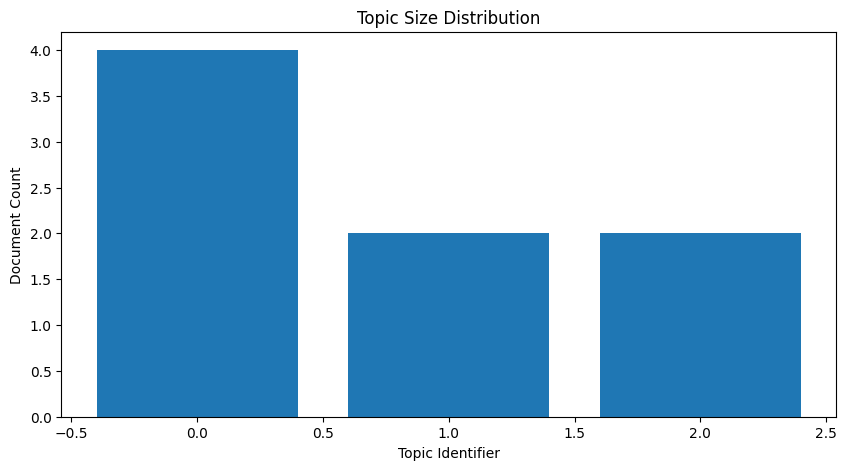

Topic similarity visualization has failed: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.


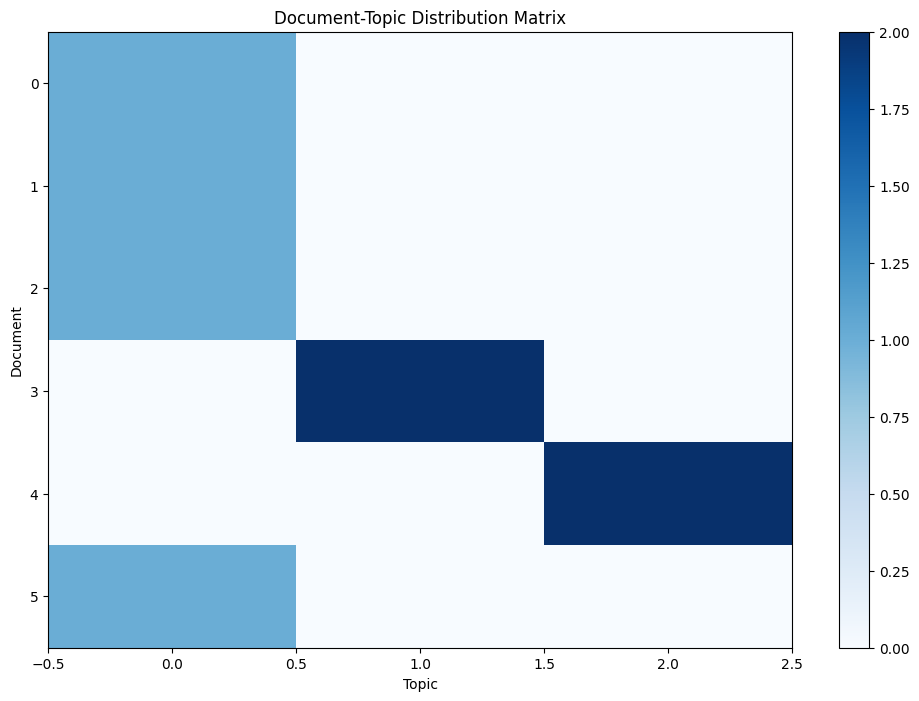

In [9]:
import numpy as np
import pandas as pd
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

document_corpus = [
    "renewable energy which is solar wind power sustainable resources electricity",
    "climate change global warming carbon emissions greenhouse effect are some issues",
    "ocean conservation affecting marine life coral reef ecosystem biodiversity",
    "recycling waste management plastic reduction circular economy",
    "forest conservation and deforestation habitat protection wildlife preservation"
    "climate change global warming carbon emissions greenhouse effect are some issues",
    "ocean conservation affecting marine life coral reef ecosystem biodiversity",
    "recycling waste management plastic reduction circular economy",
    "forest conservation and deforestation habitat protection wildlife preservation"
]


embedding_reducer = UMAP(
    n_neighbors=2,
    n_components=2,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

cluster_analyzer = HDBSCAN(
    min_cluster_size=2,
    min_samples=1,
    metric='euclidean',
    cluster_selection_method='eom'
)

text_vectorizer = CountVectorizer(
    stop_words="english",
    min_df=1,  # Changed from 2 to 1
    ngram_range=(1, 2)
)


semantic_analyzer = BERTopic(
    umap_model=embedding_reducer,
    hdbscan_model=cluster_analyzer,
    vectorizer_model=text_vectorizer,
    min_topic_size=2,
    nr_topics="auto",
    verbose=True
)

# Training model and transform documents
topic_assignments, topic_probabilities = semantic_analyzer.fit_transform(document_corpus)

# Displaying topic information
print("\nDiscovered Topics:")
topic_summary = semantic_analyzer.get_topic_info()
print(topic_summary)

print("\nKeywords per topic:")
for topic_identifier in sorted(list(set(topic_assignments))):
    if topic_identifier != -1:
        topic_keywords = semantic_analyzer.get_topic(topic_identifier)
        print(f"\nTopic {topic_identifier}:")
        print(", ".join([keyword[0] for keyword in topic_keywords[:10]]))

# Visualization 1: Topic Distribution
topic_distribution = [len([t for t in topic_assignments if t == topic_id])
                     for topic_id in sorted(list(set(topic_assignments)))]
plt.figure(figsize=(10, 5))
plt.bar(range(len(topic_distribution)), topic_distribution)
plt.xlabel('Topic Identifier')
plt.ylabel('Document Count')
plt.title('Topic Size Distribution')
plt.show()

# Visualization 2: Topic Similarity Network
try:
    if len(set(topic_assignments)) > 1:
        similarity_network = semantic_analyzer.visualize_topics()
        plt.show()
except Exception as error_msg:
    print("Topic similarity visualization has failed:", str(error_msg))

# Visualization 3: Document-Topic Matrix
document_analysis = semantic_analyzer.get_document_info(document_corpus)
topic_distribution_matrix = pd.crosstab(document_analysis.Document, document_analysis.Topic)
plt.figure(figsize=(12, 8))
plt.imshow(topic_distribution_matrix, aspect='auto', cmap='Blues')
plt.colorbar()
plt.xlabel('Topic')
plt.ylabel('Document')
plt.title('Document-Topic Distribution Matrix')
plt.show()

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [5]:
"""BERTopic is the preferred framework beacuse of using its state-of-the-art comprehension of language and semantics and its reliability over various analytical contexts. Classical methodologies like LDA and NMF maintain their relevance, especially in scenarios where resource efficiency and implementation simplicity are given priority above peak performance metrics."""

'BERTopic is the preferred framework beacuse of using its state-of-the-art comprehension of language and semantics and its reliability over various analytical contexts. Classical methodologies like LDA and NMF maintain their relevance, especially in scenarios where resource efficiency and implementation simplicity are given priority above peak performance metrics.'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [6]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Engaging in these experiments helped me to get hands-on expertise with various frameworks including Latent Semantic Analysis, Latent Dirichlet Allocation, Non-negative Matrix Factorization, and BERTopic, which highlights their comparative advantage and also their limitations, and industry implementations which are in practice. Challenges include: Dealing with complexities like hyperparameter optimization and handling extensive texts improved analytical capabilities and deepened my understanding of linguistic processing techniques in Natural Language Processing. Also time provided is limited which became an issue in completing the exercise.
'''

'\nEngaging in these experiments helped me to get hands-on expertise with various frameworks including Latent Semantic Analysis, Latent Dirichlet Allocation, Non-negative Matrix Factorization, and BERTopic, which highlights their comparative advantage and also their limitations, and industry implementations which are in practice. Challenges include: Dealing with complexities like hyperparameter optimization and handling extensive texts improved analytical capabilities and deepened my understanding of linguistic processing techniques in Natural Language Processing. Also time provided is limited which became an issue in completing the exercise.\n'